In [1]:

import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import random as rd


In [2]:

# Load data file
mat = scipy.io.loadmat('ex3data1.mat')

In [3]:

def choice(n):
    # Generate two random numbers to choose a random range of examples
    random_number1 = rd.randint(0, n)
    random_number2 = random_number1 + 20
    return random_number1, random_number2

In [4]:

mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [5]:

def display_data(X, example_width=None):
    # Set example_width automatically if not passed in
    if example_width is None:
        example_width = int(np.round(np.sqrt(X.shape[1])))

    # Compute rows, cols
    m, n = X.shape
    example_height = n // example_width

    # Compute number of items to display
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))

    # Padding between images
    pad = 1

    # Create a blank display
    display_array = -np.ones((pad + display_rows * (example_height + pad),
                              pad + display_cols * (example_width + pad)))

    curr_ex = 0
    for j in range(display_rows):
        for i in range(display_cols):
            if curr_ex >= m:
                break
            # Copy the patch
            max_val = np.max(np.abs(X[curr_ex, :]))
            display_array[pad + j * (example_height + pad) + np.arange(example_height),
                          pad + i * (example_width + pad) + np.arange(example_width)[:, np.newaxis]] = \
                          X[curr_ex, :].reshape(example_height, example_width) / max_val
            curr_ex += 1
        if curr_ex >= m:
            break

    # Display the image
    plt.imshow(display_array, cmap='gray', vmin=-1, vmax=1)
    plt.axis('off')
    plt.show()

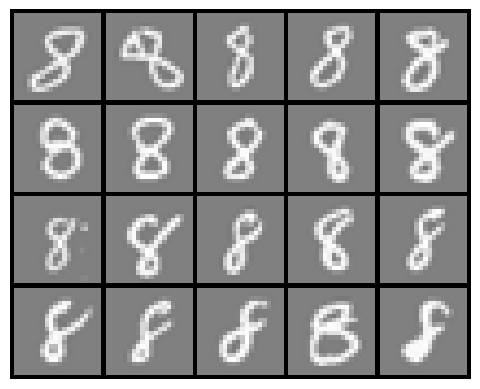

In [6]:

a, b = choice(5000)
display_data(mat['X'][a:b])

In [7]:

m, n = mat["X"].shape
X = np.ones((5000, 401))  # Initialize the X matrix with ones
X[:, 1:] = mat["X"]  # Copy the actual data into X

In [8]:

base_array = np.array([10, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:

# Create the matrix by tiling the base array along columns (axis=1)
Y = np.tile(base_array, (5000, 1)).T

In [10]:

# Convert the expected output Y to the form that the model outputs
for i in range(5000):
    Y[:, i] = (Y[:, i] == mat["y"][i]).astype(int)

In [11]:

yt = Y.T
theta = np.zeros((401, 10))  # Initialize the parameter matrix

In [12]:

# Sigmoid function to model probability

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [13]:

# Define the cost function for logistic regression
def Costfunction(h, yt):
    epsilon = 1e-15  # Small constant to avoid division by zero
    clipped_h = np.clip(h, epsilon, 1 - epsilon)  # Clip h between epsilon and 1-epsilon
    return -(1/m) * np.sum(yt * np.log(clipped_h) + (1 - yt) * np.log(1 - clipped_h))

In [14]:

# Set hyperparameters for training
alpha = 0.01
num_iterations = 25000
cost_history = np.zeros((num_iterations, 1))
iteration_history = np.arange(num_iterations).reshape(-1, 1)

In [15]:

# Gradient Descent
for i in range(num_iterations):
    h = sigmoid(X.dot(theta))  # Calculate hypothesis using sigmoid function
    gradient = (1/m) * np.dot(X.T, (h - yt))  # Compute gradient of cost function
    theta = theta - (alpha * gradient)  # Update parameters using gradient descent
    cost_history[i, 0] = Costfunction(h, yt)  # Calculate and store the cost

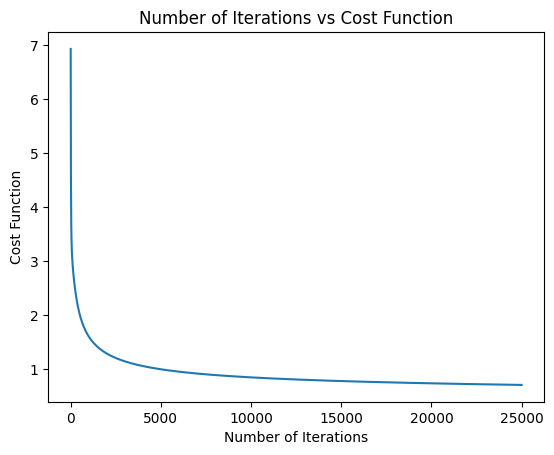

In [16]:

# Plot cost function over iterations
plt.figure()
plt.plot(iteration_history, cost_history)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost Function')
plt.title('Number of Iterations vs Cost Function')
plt.show()

In [17]:
# predicting using the model
g= theta.T
h_prediction = sigmoid(np.dot(g, X.T))
prediction = (h_prediction >= 0.5).astype(int)
Y.shape

(10, 5000)

In [18]:

# Compare the matrices element-wise and create a boolean matrix indicating differences
differences = prediction != Y

# Calculate the percentage of differences
percentage_wrong = (np.count_nonzero(differences) / differences.size) * 100
percentage_correct = 100 - percentage_wrong

print("Percentage of elements that are correct: {:.2f}%".format(percentage_correct))

Percentage of elements that are correct: 97.84%
